In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [183]:
data = np.loadtxt('cancer_data.csv', delimiter=',')

# number of independent variables - length of theta vector
n = data.shape[1]

# number of training examples
m = data.shape[0]
print("m = %d, n = %d" % (m, n))

m = 3047, n = 10


## Normalize the data

using the following formula: 
$$x = \frac{x - \mu}{\sigma}$$
where $\mu$ is the mean of a column and $\sigma$ is the standart deviation

In [184]:
mu = data.mean(axis=0)
sigma = data.std(axis=0)
norm_data = (data - mu)/sigma

Clean the data

<Axes: >

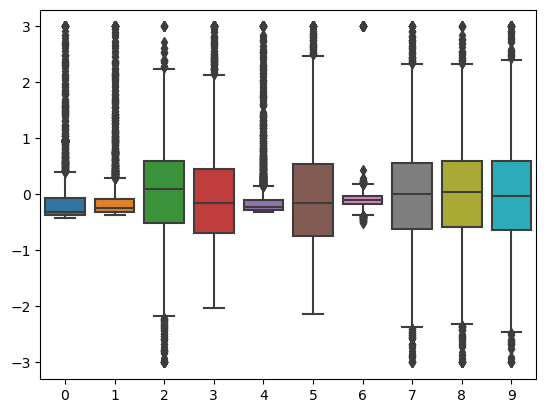

In [185]:
norm_data[norm_data > 3] = 3
norm_data[norm_data < -3] = -3

# visualize the data
sns.boxplot(data=norm_data)

Seperate the data into matrix X the size m*(n+1) and vector y the size m as follows
$$
X = \begin{bmatrix}
1 & x_1^{(1)} & x_2^{(2)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)} \\
\end{bmatrix}
, \quad
y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}

In [186]:
X = norm_data[:, :-1]
# add a column of ones to X
X = np.hstack((np.ones((m, 1)), X))

y = norm_data[:, -1]
y = y.reshape(m, 1)

## Model function, cost function and cost function gradient

In [187]:
# function receive theta and vector x and return the value of the hypothesis function
def h_theta(theta, X):
    return np.dot(X, theta)

# function receive vector theta, matrix x and vector y and return the value of the loss function
def loss_function(theta, X, y):
    m = X.shape[0]
    return np.sum(np.square(h_theta(theta, X) - y)) / (2 * m)

# function receive vector theta, matrix x and vector y and return the gradient
def gradient(theta, x, y):
    m = x.shape[0]
    return np.dot(x.T, h_theta(theta, x) - y) / m

## Gradient Descent implementations

In [188]:
def gradient_descent(X, y, alpha, iterations, epsilon = 0.000001, delta = 0.0000001):
    # initialize theta
    theta = np.zeros((X.shape[1], 1))

    # initialize loss function
    loss = [loss_function(theta, X, y)]

    for i in range(iterations):
        theta_tmp = theta
        theta = theta_tmp - alpha * gradient(theta, X, y)
        loss.append(loss_function(theta, X, y))

        # check stop conditions
        if (len(loss) > 1 and abs(loss[-1] - loss[-2]) < epsilon) or np.linalg.norm(gradient(theta, X, y)) < delta:
            break

    return theta, loss

def mini_batch(X, y, alpha, iterations, batch_size, epsilon = 0.000001, delta = 0.0000001):
    # initialize theta
    theta = np.zeros((X.shape[1], 1))

    # initialize loss function
    loss = [loss_function(theta, X, y)]

    num_of_batches = m // batch_size
    for i in range(iterations):
        batch_number = i % num_of_batches

        X_batch = X[batch_number * batch_size : (batch_number + 1) * batch_size, :]
        y_batch = y[batch_number * batch_size : (batch_number + 1) * batch_size]

        grad = gradient(theta, X_batch, y_batch)
        theta = theta - alpha * grad
        loss.append(loss_function(theta, X, y))

        # check stop conditions
        if (len(loss) > 1 and abs(loss[-1] - loss[-2]) < epsilon) or np.linalg.norm(gradient(theta, X, y)) < delta:
            break

    return theta, loss

def momentum(X, y, iterations, alpha, epsilon = 0.000001, delta = 0.0000001):
    # initialize theta
    theta = np.zeros((X.shape[1], 1))

    # initialize loss function
    loss = [loss_function(theta, X, y)]

    # initialize v
    v = 0

    for i in range(iterations):
        theta_tmp = theta
        v = 0.9 * v + alpha * gradient(theta, X, y)
        theta = theta_tmp - v
        loss.append(loss_function(theta, X, y))

        # check stop conditions
        if (len(loss) > 1 and abs(loss[-1] - loss[-2]) < epsilon) or np.linalg.norm(gradient(theta, X, y)) < delta:
            break

    return theta, loss

### Gradient Descent

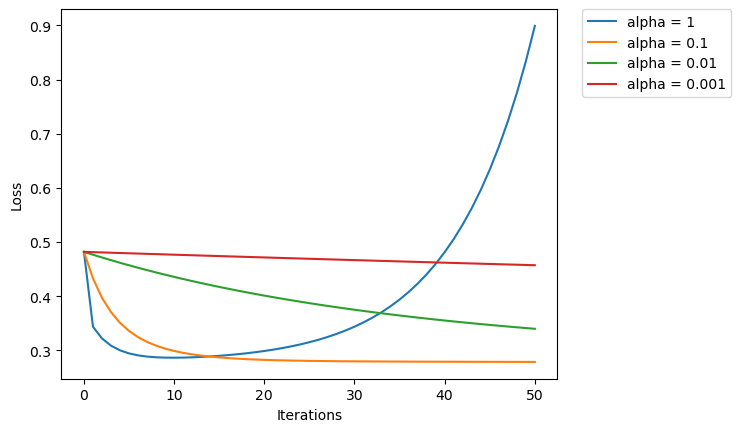

In [189]:
#  initialize number of iterations
k = 50

alphas = [1, 0.1, 0.01, 0.001]
losses = {a: gradient_descent(X, y, a, k) for a in alphas}
plots = {a: plt.plot(losses[a][1], label=f"alpha = {a}") for a in alphas}

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [190]:
# print loss function
for a in alphas:
    print(f"alpha = {a}, loss = {losses[a][1][-1]}")


alpha = 1, loss = 0.8991607780562272
alpha = 0.1, loss = 0.278812599756944
alpha = 0.01, loss = 0.33999652596492586
alpha = 0.001, loss = 0.45737293608986357


Using regular gradient descent the best result got when using $\alpha$ = 0.1

### Mini Batch Gradient Descent

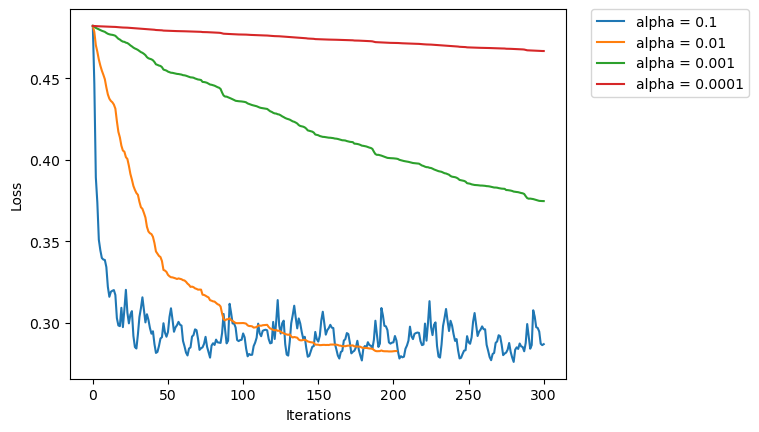

In [191]:
#  initialize batch size
batch_size = 30
k = 300

alphas = [0.1, 0.01, 0.001, 0.0001]
losses = {a: mini_batch(X, y, a, k, batch_size) for a in alphas}
plots = {a: plt.plot(losses[a][1], label=f"alpha = {a}") for a in alphas}

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [192]:
# print loss function
for a in alphas:
    print(f"alpha = {a}, loss = {losses[a][1][-1]}")

alpha = 0.1, loss = 0.2869444643500033
alpha = 0.01, loss = 0.282713233013308
alpha = 0.001, loss = 0.3746349631030795
alpha = 0.0001, loss = 0.46662852382620945


Using mini-batch gradient descent shows that using $\alpha$ = 0.1 might give better results but it is volatile and unreliable in converging to the minimum in this case, overpassing the 200 iterations will show that $\alpha$ = 0.01 reaches the minimum at a steady pase and gives better results.

### Momentum

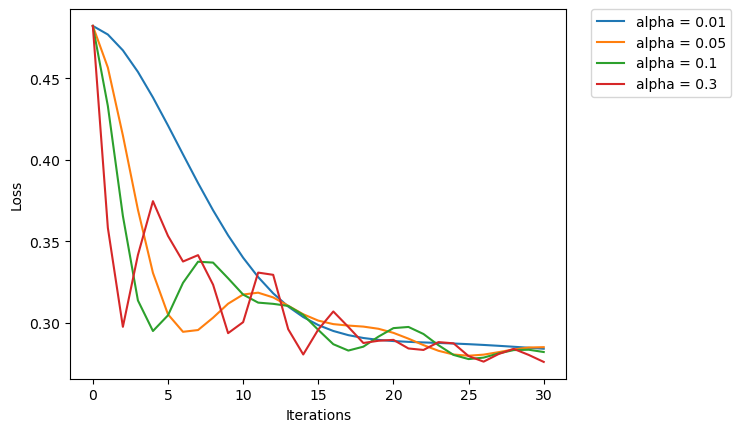

In [199]:
k = 50
alphas = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
losses = {a: momentum(X, y, k, a) for a in alphas}
plots = {a: plt.plot(losses[a][1], label=f"alpha = {a}") for a in alphas}

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [198]:
# print loss function
for a in alphas:
    print(f"alpha = {a}, loss = {losses[a][1][-1]}")

alpha = 0.01, loss = 0.28010845477679447
alpha = 0.05, loss = 0.2768314818109462
alpha = 0.1, loss = 0.2759489979340276
alpha = 0.3, loss = 0.2728306906261235
alpha = 0.5, loss = 0.272358043084759
alpha = 0.7, loss = 0.2725525711070983
alpha = 0.9, loss = 0.27284309742635116


Using momentum shows that giving the current gradient more wheight past $\alpha$ = 0.5 doesnt give better results in converging to the minimum of the function.

## Conclusion

Overall the method that gave the best result was the Momentum gradient descent, converging to the minimum faster than all other methods without volatile graph behavior 